## Build a machine learning  model for the dataset whether HIV-1 protease will cleave in the central position (between amino acids 4 and 5)

### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
from ipynb.fs.full.ml_library import *
import os
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')

# reading dataset from different files & storing in pandas dataframe
hiv_data = pd.read_table('746Data.txt', sep=',',names=['octamer','cleaves'])
hiv_data = hiv_data.append(pd.read_table('1625Data.txt', sep=',',names=['octamer','cleaves']))
hiv_data = hiv_data.append(pd.read_table('schillingData.txt', sep=',',names=['octamer','cleaves']))
hiv_data = hiv_data.append(pd.read_table('impensData.txt', sep=',',names=['octamer','cleaves']))
hiv_data.head()

,octamer,cleaves
0,AAAKFERQ,-1
1,AAAMKRHG,-1
2,AAAMSSAI,-1
3,AAKFERQH,-1
4,AAKFESNF,-1


#### Using already done data preprocessing steps

In [2]:
import joblib
file = open('DataProcessingHIV.pkl', 'rb')
feature = joblib.load(file)
label = joblib.load(file)
one_hot_encode = joblib.load(file)
file.close()

In [3]:
# using custom library fn for dividing octamer column into 8 separate features
x_values = separate_feature_column(hiv_data, feature)
x_values[:10]

array([['A', 'A', 'A', 'K', 'F', 'E', 'R', 'Q'],
       ['A', 'A', 'A', 'M', 'K', 'R', 'H', 'G'],
       ['A', 'A', 'A', 'M', 'S', 'S', 'A', 'I'],
       ['A', 'A', 'K', 'F', 'E', 'R', 'Q', 'H'],
       ['A', 'A', 'K', 'F', 'E', 'S', 'N', 'F'],
       ['A', 'A', 'M', 'K', 'R', 'H', 'G', 'L'],
       ['A', 'A', 'S', 'S', 'S', 'N', 'Y', 'C'],
       ['A', 'A', 'V', 'L', 'A', 'E', 'A', 'M'],
       ['A', 'C', 'E', 'G', 'N', 'P', 'Y', 'V'],
       ['A', 'C', 'K', 'N', 'G', 'Q', 'T', 'N']], dtype='<U32')

#### One hot encoding for each column created

In [4]:
x_values = one_hot_encode.transform(x_values)
y_values = hiv_data[label].values
y_values[y_values == -1] = 0

#### Splitting dataset into train set & test set

In [5]:
from sklearn.model_selection import train_test_split
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.7, random_state=0)

### Building K- Nearest Neighbours (KNN) model

In [6]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_x_values, train_y_values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Storing reusable objects into pickle file

In [7]:
import joblib

file = open('KNNModelHIV.pkl', 'wb')
joblib.dump(classifier, file)
file.close()

#### Storing predictions for test set

In [8]:
test_prediction = classifier.predict(test_x_values)

### Evaluatinig model against test set

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')
print(f'\nAccuracy score: {accuracy_score(test_y_values, test_prediction)}')
print(f'Precision score: {precision_score(test_y_values, test_prediction)}')
print(f'Recall score: {recall_score(test_y_values, test_prediction)}')
print(f'F1 score: {f1_score(test_y_values, test_prediction)}')
print(f'\nClassification report:\n {classification_report(test_y_values, test_prediction)}')

Confusion matrix:
 [[1459  107]
 [ 117  294]]

Accuracy score: 0.8866970156803238
Precision score: 0.7331670822942643
Recall score: 0.7153284671532847
F1 score: 0.7241379310344827

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1566
           1       0.73      0.72      0.72       411

    accuracy                           0.89      1977
   macro avg       0.83      0.82      0.83      1977
weighted avg       0.89      0.89      0.89      1977



### Plotting CAP (Cumulative Accuracy Profile) curve

Accuracy using CAP curve: 0.7153284671532847


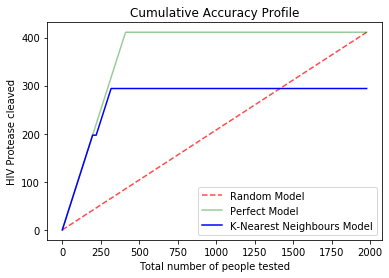

In [10]:
prob = 0.5        # in sklearn threshold probability for classification is by default 0.5
plot_cap_curve(test_y_values, test_x_values, classifier, prob, 'Total number of people tested', 'HIV Protease cleaved', 'K-Nearest Neighbours Model')

### Adjusting precision & recall according to goal

#### If we want precision in accurate prediction of patients whose HIV protease will cleave (high precision score)

In [11]:
test_prob = classifier.predict_proba(test_x_values)[:,1]
prob = 0.7
test_prediction = np.where(test_prob > prob, 1, 0)

In [12]:
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')
print(f'Recall score: {recall_score(test_y_values, test_prediction)}')
print(f'Precision score: {precision_score(test_y_values, test_prediction)}')

Confusion matrix:
 [[1543   23]
 [ 214  197]]
Recall score: 0.4793187347931874
Precision score: 0.8954545454545455


#### Plotting CAP curve for high precision

Accuracy using CAP curve: 0.4793187347931874


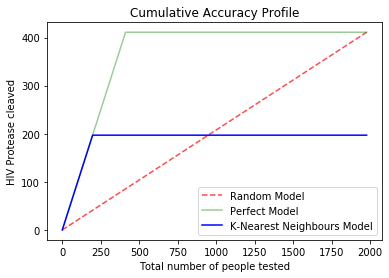

In [13]:
plot_cap_curve(test_y_values, test_x_values, classifier, prob, 'Total number of people tested', 'HIV Protease cleaved', 'K-Nearest Neighbours Model')

#### If we want to miss out minimum accurate predictions of patient whose HIV protease will cleave (high recall score)

In [14]:
test_prob = classifier.predict_proba(test_x_values)[:,1]
prob = 0.3
test_prediction = np.where(test_prob > prob, 1, 0)

In [15]:
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')
print(f'Recall score: {recall_score(test_y_values, test_prediction)}')
print(f'Precision score: {precision_score(test_y_values, test_prediction)}')

Confusion matrix:
 [[1117  449]
 [  40  371]]
Recall score: 0.902676399026764
Precision score: 0.4524390243902439


#### Plotting CAP curve for high recall

Accuracy using CAP curve: 0.902676399026764


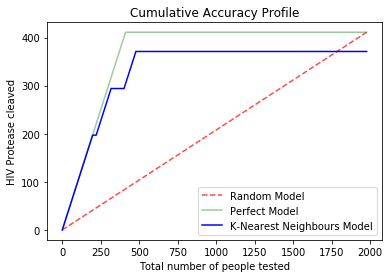

In [16]:
plot_cap_curve(test_y_values, test_x_values, classifier, prob, 'Total number of people tested', 'HIV Protease cleaved', 'K-Nearest Neighbours Model')